In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np

from usa.analysis.base import GE_US, resample_GE
from usa.analysis.fmbv import fmbv_v0 as fmbv

import matplotlib.pyplot as plt

In [3]:
"""
    Load and process data.
"""
PD_PATH = "data/wl1_12_dp.nii.gz"
SEG_PATH = "data/wl1_12_seg.nii.gz"
KRETZ_PATH = "data/wl1_12.vol"

us = GE_US(minimise_memory=False)
us.load_kretz(KRETZ_PATH)
us.load_pd(PD_PATH)
us.load_seg(SEG_PATH)
# us.load_default_seg()
# us.set_distance()

us_resample = resample_GE(us, 0.5)

f = fmbv(us_resample, verbose=True)
f.global_method()
f.depth_correction_method()

print(f.start_depth)

print(us_resample.seg_volume)

[verbose] --- New FMBV(version=0) instance. ---
[verbose] * I am in global method...
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 51
[verbose] std_value_2 = 118
[verbose] Calculating FMBVs...
[verbose] Global FMBV: 16.10204947036557
[verbose] * I am in depth-correction method...
[verbose] -> Entering onion...
[verbose] 
 Layer 1 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 6
[verbose] 
 Layer 2 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 6
[verbose] 
 Layer 3 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 5
[verbose] 
 Layer 4 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 4
[verbose] 
 Layer 5 out of 28
[verbose] * I am in two-tangent method...
expected non-empty vector for x
[verbose] 
 Layer 6 out of 28


/Users/jackh/Documents/PIRG/usa/usa/analysis/fmbv.py:164: RankWarning: Polyfit may be poorly conditioned
  return v0.two_tangent_standardisation(


[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 10
[verbose] std_value_2 = 20
[verbose] 
 Layer 7 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 18
[verbose] std_value_2 = 47
[verbose] 
 Layer 8 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 30
[verbose] std_value_2 = 92
[verbose] 
 Layer 9 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 41
[verbose] std_value_2 = 110
[verbose] 
 Layer 10 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 50
[verbose] std_value_2 = 116
[verbose] 
 Layer 11 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 56
[verbose] std_value_2 = 118
[verbose] 
 Layer 12 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 53
[verbose] std_value_2 = 117
[verbose] 
 Layer 13 out of 28
[verbose] * I am in two-tangent method...
[verbose] std_value_1 = 45
[verbose] std_value_2 = 122
[verbose] 
 L

In [130]:
# Set global visualisation variables.
pd_array = us.pd_array
j_ = int(.5*pd_array.shape[1])

dist = us.distance

std1, std2 = f.global_standardisation_value_1, f.global_standardisation_value_2

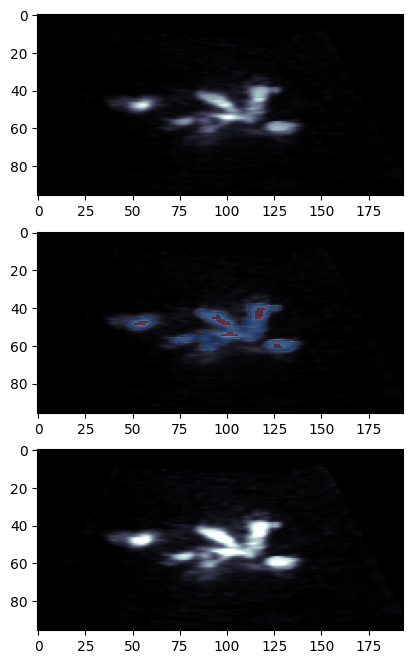

In [131]:
"""
    Visualise power Doppler standardisation.

    1. Original image.
    2. Separate image into its standardised components.
    3. Final standardised image (pre-FMBV).
"""

fig, ax = plt.subplots(3)
fig.set_figheight(8)
fig.set_figwidth(5)

# 1. ---
ax[0].imshow(pd_array[:,j_,:],cmap='bone')

# 2. ---
ax[1].imshow(pd_array[:,j_,:],cmap='bone')

# standardisation 1
masked1 = np.ma.masked_where(pd_array < std1,np.ones(pd_array.shape))
ax[1].imshow(masked1[:,int(.5*pd_array.shape[1]),:],alpha=0.6,cmap='Blues',vmin=0, vmax=1)

# standardisation 2
masked2 = np.ma.masked_where(pd_array < std2, np.ones(pd_array.shape))
ax[1].imshow(masked2[:,int(.5*pd_array.shape[1]),:],alpha=0.6,cmap = 'Reds',vmin=0, vmax=1)

# 3. ---
ax[2].imshow(f.pd_array_global_standardisation[:,j_,:],cmap='bone')

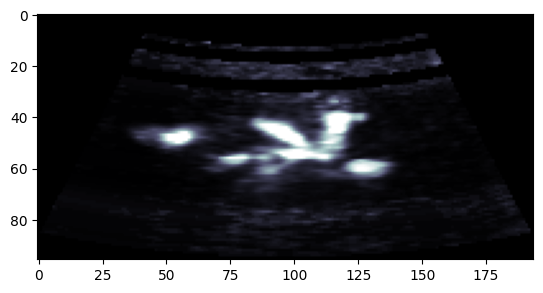

In [132]:
"""
    Depth-corrected image.
"""

plt.imshow(f.pd_array_depth_corrected_standardisation[:,j_,:], cmap='bone')

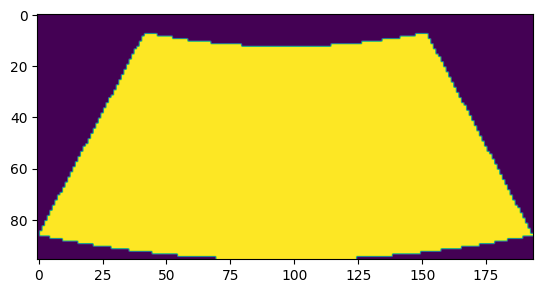

In [133]:
"""
    Segmentation mask.
"""
plt.imshow(us.seg_array[:,j_,:])

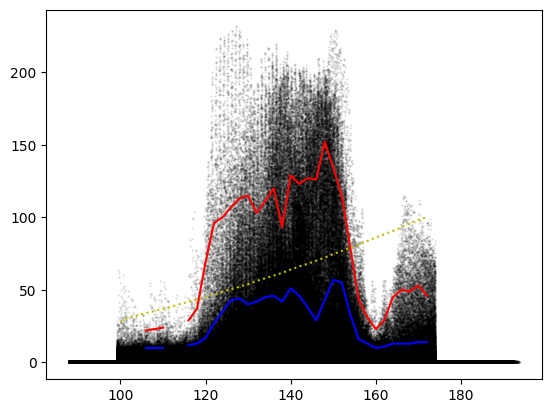

In [134]:
"""
    Attenuation plots.

    We can plot the image intensity with depth from the transducer surface
    to infer the signal attenuation present in the image, as well as observe the
    effects of vascular layers on the bias of layer standardisation.
"""

noise = 1*np.random.random(np.shape(pd_array)) # noise added for visualisation purposes
pd_array = pd_array + noise

plt.figure()
plt.scatter(dist.flatten(),pd_array.flatten(),c='k',s=0.5,alpha=0.1)

plt.plot(f.depths,f.depth_correction_standard_values_1, c='b')
plt.plot(f.depths,f.depth_correction_standard_values_2, c='r')

# proportional to number 
plt.plot(f.depths,100*np.array(f.vxl_nums)/np.max(f.vxl_nums), c='y', linestyle='dotted')

In [135]:
"""
    Interactive plot.
"""


'\n    Interactive plot.\n'